In [2]:
import keras
keras.__version__
import keras
keras.__version__
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [ ]:
pip install --upgrade tensorflow

In [4]:
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from google.colab import files
import re, os
from keras.layers import Dropout

In [ ]:
pip install scikit-learn

**Creating an embedding layer:**

In [6]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

**Train and Test set with cut off and Max features:**

In [71]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

Add learing rate as Hyperparameter:

In [72]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))# 10000 the size of the vocabulary (the number of unique words),8 the dense word vectors for each word in the vocabulary.
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 20, 8)             80000     
                                                                 
 flatten_16 (Flatten)        (None, 160)               0         
                                                                 
 dense_16 (Dense)            (None, 1)                 161       
                                                                 
Total params: 80161 (313.13 KB)
Trainable params: 80161 (313.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
612/625 [============================>.] - ETA: 0s - loss: 0.6798 - acc: 0.5842

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
625/625 [==============================] - 2s 2ms/step - loss: 0.6790 - acc: 0.5868 - val_loss: 0.6418 - val_acc: 0.6770
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5618 - acc: 0.7425 - val_loss: 0.5361 - val_acc: 0.7284
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4708 - acc: 0.7850 - val_loss: 0.5053 - val_acc: 0.7438
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4281 - acc: 0.8044 - val_loss: 0.4981 - val_acc: 0.7472
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4009 - acc: 0.8202 - val_loss: 0.4988 - val_acc: 0.7548
Epoch 6/

<ipython-input-38-70bcc8a2e93a>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


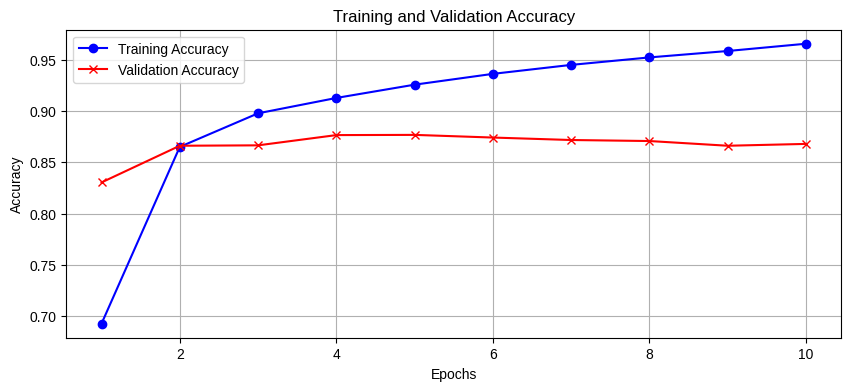

<ipython-input-38-70bcc8a2e93a>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


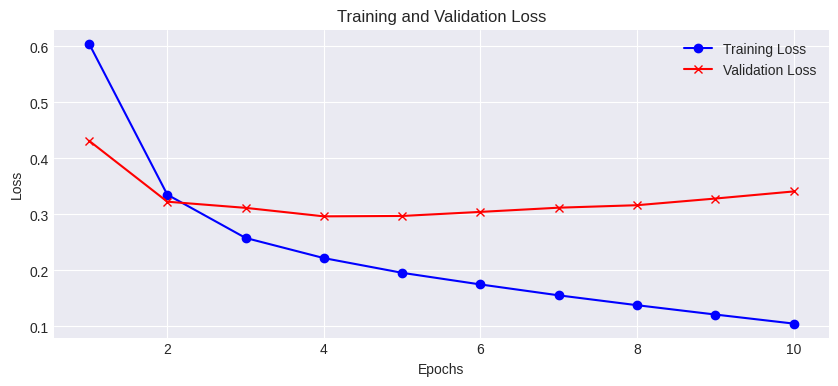

In [38]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Creating a new figure for accuracy and modifying the plot
plt.figure(figsize=(10, 4))

plt.plot(epochs, acc, 'b', label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy', marker='x')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.style.use('seaborn-darkgrid')

plt.show()

# Creating a new figure for loss and modifying the plot
plt.figure(figsize=(10, 4))

plt.plot(epochs, loss, 'b', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, 'r', label='Validation Loss', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.style.use('seaborn-darkgrid')
plt.show()

Splitting the data into training and validation to set different sample size

Scenario 1: Cut-off words: 150, Training samples: 100, Validation samples: 10000, Word count: 10,000

In [73]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=100, test_size=10000, random_state=42, stratify=labels)

# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
model.add(Embedding(10000, 8, input_length=maxlen))

# Flattening the Size
model.add(Flatten())

# Adding the Classifer on the top - As the final layer
model.add(Dense(1, activation = 'sigmoid'))

# Compiling the Model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [75]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_17 (Flatten)        (None, 1200)              0         
                                                                 
 dense_17 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Running the Model:

In [76]:
from keras.callbacks import ModelCheckpoint

callbacks = ModelCheckpoint(
    filepath="convnet_from_scratch.keras.h",
    save_best_only=True,
    monitor="val_loss"
)

# Model Fit - Running the Model
Model_2 = model.fit(train_texts, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=[callbacks])  # Note: callbacks should be provided as a list


Epoch 1/10
4/4 [==============================] - 1s 312ms/step - loss: 0.5396 - acc: 1.0000 - val_loss: 0.6932 - val_acc: 0.5038
Epoch 2/10
4/4 [==============================] - 1s 294ms/step - loss: 0.5241 - acc: 1.0000 - val_loss: 0.6932 - val_acc: 0.5023
Epoch 3/10
4/4 [==============================] - 1s 274ms/step - loss: 0.5079 - acc: 1.0000 - val_loss: 0.6932 - val_acc: 0.5032
Epoch 4/10
4/4 [==============================] - 1s 318ms/step - loss: 0.4916 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 0.5034
Epoch 5/10
4/4 [==============================] - 1s 218ms/step - loss: 0.4748 - acc: 1.0000 - val_loss: 0.6932 - val_acc: 0.5043
Epoch 6/10
4/4 [==============================] - 1s 216ms/step - loss: 0.4581 - acc: 1.0000 - val_loss: 0.6936 - val_acc: 0.5022
Epoch 7/10
4/4 [==============================] - 0s 116ms/step - loss: 0.4415 - acc: 1.0000 - val_loss: 0.6936 - val_acc: 0.5019
Epoch 8/10
4/4 [==============================] - 0s 119ms/step - loss: 0.4241 - acc: 1.00

Scenario 2: Cut-off words: 100, Training samples: 200, Validation samples: 1000, Word count: 10,000

In [57]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 100 words
maxlen = 100
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=200, test_size=1000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)
# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
model.add(Embedding(10000, 8, input_length=maxlen))

# Flattening the Size
model.add(Flatten())

# Adding the Classifer on the top - As the final layer
model.add(Dense(1, activation = 'sigmoid'))

# Compiling the Model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])


In [58]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 8)            80000     
                                                                 
 flatten_11 (Flatten)        (None, 800)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 801       
                                                                 
Total params: 80801 (315.63 KB)
Trainable params: 80801 (315.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
from keras.callbacks import ModelCheckpoint

callbacks = ModelCheckpoint(
    filepath="convnet_from_scratch.keras.h",
    save_best_only=True,
    monitor="val_loss"
)
# Model Fit - Running the Model
Model_2 = model.fit(train_texts, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=[callbacks])  # Note: callbacks should be provided as a list

Epoch 1/10
7/7 [==============================] - 1s 83ms/step - loss: 0.5149 - acc: 0.9950 - val_loss: 0.6932 - val_acc: 0.5040
Epoch 2/10
7/7 [==============================] - 0s 16ms/step - loss: 0.4927 - acc: 0.9950 - val_loss: 0.6934 - val_acc: 0.5010
Epoch 3/10
7/7 [==============================] - 0s 16ms/step - loss: 0.4696 - acc: 0.9950 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 4/10
7/7 [==============================] - 0s 12ms/step - loss: 0.4460 - acc: 0.9950 - val_loss: 0.6939 - val_acc: 0.5010
Epoch 5/10
7/7 [==============================] - 0s 15ms/step - loss: 0.4223 - acc: 1.0000 - val_loss: 0.6942 - val_acc: 0.5030
Epoch 6/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3984 - acc: 1.0000 - val_loss: 0.6945 - val_acc: 0.5010
Epoch 7/10
7/7 [==============================] - 0s 12ms/step - loss: 0.3746 - acc: 1.0000 - val_loss: 0.6949 - val_acc: 0.5040
Epoch 8/10
7/7 [==============================] - 0s 12ms/step - loss: 0.3512 - acc: 1.0000 - val

Scenario 3: Cut-off words: 20, Training samples: 10000, Validation samples: 10000, Word count: 10,000

In [61]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 20
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=10000, test_size=10000, random_state=42, stratify=labels)


# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
model.add(Embedding(10000, 8, input_length=maxlen))

# Flattening the Size
model.add(Flatten())

# Adding the Classifer on the top - As the final layer
model.add(Dense(1, activation = 'sigmoid'))

# Compiling the Model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [63]:
from keras.callbacks import ModelCheckpoint

callbacks = ModelCheckpoint(
    filepath="convnet_from_scratch.keras.h",
    save_best_only=True,
    monitor="val_loss"
)
# Model Fit - Running the Model
Model_2 = model.fit(train_texts, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=[callbacks])  # Note: callbacks should be provided as a list

Epoch 1/10
313/313 [==============================] - 1s 4ms/step - loss: 0.2758 - acc: 0.8940 - val_loss: 0.5241 - val_acc: 0.7470
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 0.2562 - acc: 0.9039 - val_loss: 0.5343 - val_acc: 0.7440
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 0.2379 - acc: 0.9136 - val_loss: 0.5426 - val_acc: 0.7465
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2203 - acc: 0.9223 - val_loss: 0.5541 - val_acc: 0.7420
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 0.2043 - acc: 0.9293 - val_loss: 0.5652 - val_acc: 0.7390
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1890 - acc: 0.9353 - val_loss: 0.5782 - val_acc: 0.7367
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1749 - acc: 0.9408 - val_loss: 0.5915 - val_acc: 0.7342
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 0.

Scenario 4: Cut-off words: 150, Training samples: 20000, Validation samples: 20000, Word count: 10,000

In [64]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=20000, test_size=20000, random_state=42, stratify=labels)


# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
model.add(Embedding(10000, 8, input_length=maxlen))

# Flattening the Size
model.add(Flatten())

# Adding the Classifer on the top - As the final layer
model.add(Dense(1, activation = 'sigmoid'))

# Compiling the Model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [66]:
from keras.callbacks import ModelCheckpoint

callbacks = ModelCheckpoint(
    filepath="convnet_from_scratch.keras.h",
    save_best_only=True,
    monitor="val_loss"
)
# Model Fit - Running the Model
Model_2 = model.fit(train_texts, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=[callbacks])  # Note: callbacks should be provided as a list

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1013 - acc: 0.9677 - val_loss: 0.3421 - val_acc: 0.8700
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0870 - acc: 0.9749 - val_loss: 0.3486 - val_acc: 0.8711
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0744 - acc: 0.9791 - val_loss: 0.3586 - val_acc: 0.8687
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0629 - acc: 0.9836 - val_loss: 0.3735 - val_acc: 0.8677
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 0.0526 - acc: 0.9869 - val_loss: 0.3869 - val_acc: 0.8667
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0438 - acc: 0.9895 - val_loss: 0.4040 - val_acc: 0.8641
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0357 - acc: 0.9920 - val_loss: 0.4180 - val_acc: 0.8640
Epoch 8/10
625/625 [==============================] - 2s 4ms/step - loss: 0.

Scenario 5: Cut-off words: 150, Training samples: 15000, Validation samples: 10000, Word count: 10,000

In [67]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=15000, test_size=10000, random_state=42, stratify=labels)


# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
model.add(Embedding(10000, 8, input_length=maxlen))

# Flattening the Size
model.add(Flatten())

# Adding the Classifer on the top - As the final layer
model.add(Dense(1, activation = 'sigmoid'))

# Compiling the Model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [69]:
from keras.callbacks import ModelCheckpoint

callbacks = ModelCheckpoint(
    filepath="convnet_from_scratch.keras.h",
    save_best_only=True,
    monitor="val_loss"
)
# Model Fit - Running the Model
Model_2 = model.fit(train_texts, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=[callbacks])  # Note: callbacks should be provided as a list

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0816 - acc: 0.9765 - val_loss: 0.3389 - val_acc: 0.8684
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0677 - acc: 0.9819 - val_loss: 0.3547 - val_acc: 0.8631
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0552 - acc: 0.9857 - val_loss: 0.3673 - val_acc: 0.8628
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0451 - acc: 0.9897 - val_loss: 0.3817 - val_acc: 0.8611
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0365 - acc: 0.9917 - val_loss: 0.4110 - val_acc: 0.8571
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0287 - acc: 0.9943 - val_loss: 0.4173 - val_acc: 0.8578
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0229 - acc: 0.9963 - val_loss: 0.4378 - val_acc: 0.8559
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.

Downloading the IMBD Dataset:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import os

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  2911k      0  0:00:28  0:00:28 --:--:-- 6678k


Reading train and test data

In [ ]:
imdb_dir = '/content/drive/MyDrive/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Tokenizing the data

In [155]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 150  # Cut reviews after 100 words
training_samples = 15000  # Train on 1000 samples
validation_samples = 10000  # Validate on 1000 samples
max_words = 10000  # Consider the top 1000 words in the dataset

# Convert NumPy array 'texts' to a list of strings
texts_list = [str(text) for text in texts]

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts_list)
sequences = tokenizer.texts_to_sequences(texts_list)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Shuffle the data and labels
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# Split the data into training and validation sets
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


Found 9999 unique tokens.
Shape of data tensor: (50000, 150)
Shape of label tensor: (50000,)


glove embeddings

In [156]:
glove_dir = '/content/drive/MyDrive/Glove'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [157]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Model Definition:

In [158]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_30 (Flatten)        (None, 15000)             0         
                                                                 
 dense_42 (Dense)            (None, 32)                480032    
                                                                 
 dense_43 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


freezing embedding layer in the model

In [133]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Training and evaluation of the model

In [159]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
463/469 [============================>.] - ETA: 0s - loss: 0.6938 - acc: 0.4991

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
469/469 [==============================] - 5s 10ms/step - loss: 0.6938 - acc: 0.4995 - val_loss: 0.6932 - val_acc: 0.4961
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.6220 - acc: 0.6625 - val_loss: 0.7439 - val_acc: 0.4983
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2088 - acc: 0.9253 - val_loss: 1.1465 - val_acc: 0.4999
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0289 - acc: 0.9953 - val_loss: 1.5856 - val_acc: 0.4964
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0088 - acc: 0.9983 - val_loss: 1.8372 - val_acc: 0.4951
Epoch 

<ipython-input-116-964a84a70c58>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


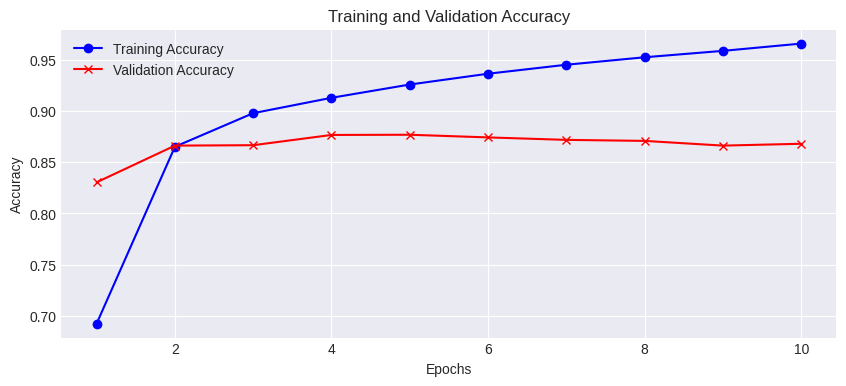

<ipython-input-116-964a84a70c58>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


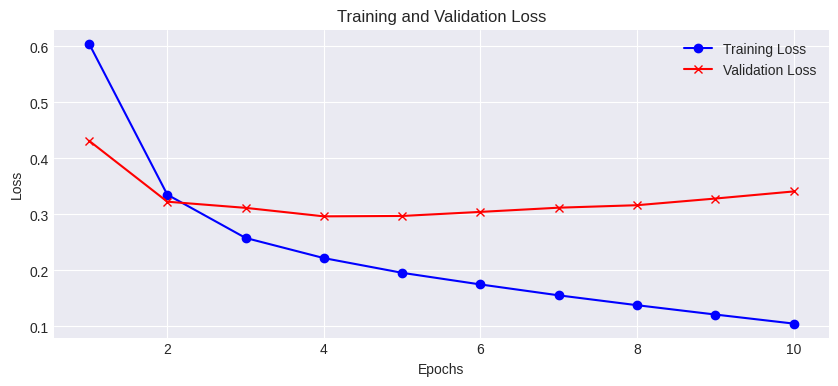

In [116]:
import matplotlib.pyplot as plt
# Plotting the Training and Validation Accuracy
plt.figure(figsize=(10, 4))

plt.plot(epochs, acc, 'b', label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy', marker='x')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.style.use('seaborn-darkgrid')

plt.show()

# Plotting the Training and Validation Loss
plt.figure(figsize=(10, 4))

plt.plot(epochs, loss, 'b', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, 'r', label='Validation Loss', marker='x')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.style.use('seaborn-darkgrid')

plt.show()


Plotting perfromance

Running the pre-trained model on test set

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 2.0456 - acc: 0.5051


[2.045579671859741, 0.5051199793815613]